In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
import warnings
!pip install xlsxwriter
warnings.filterwarnings("ignore")


Defaulting to user installation because normal site-packages is not writeable


Only for running Scenerio This Below input excel have to given 

In [ ]:
dir_to_prod_df="Reservoir_pool_Production data_22feb_input for MBAL 1.xlsx"

In [ ]:
df=pd.read_excel(dir_to_prod_df,sheet_name='Sheet1')
df.tail()

In [ ]:
df['year_month']=df['year_month'].astype('datetime64[ns]')

df['Days']=df['year_month'].dt.days_in_month
df['Date']=df['year_month']
df['year_month']=pd.to_datetime(df['year_month']).dt.strftime('%Y-%m')


In [ ]:
df.tail()

In [ ]:
#volume and bbl conversion and for gas converion of scumd to mscum to mcf
df['OIL_VOL']=df['AVG_OIL_RATE(KLPD)_true']*df['Days']*6.2898
df['GAS_VOL']=((df['AVG_GAS_RATE(scum d)_true']*df['Days'])/1000)*35.31
df['WATER_VOL']=df['AVG_WATER_RATE(KLPD)_true']*df['Days']*6.2898



In [ ]:
df.tail()

In [ ]:
#### Filtering forecasted data 

In [ ]:
df=df.loc[df['year_month']>='2022-06']

In [ ]:
#### Importing actual oil volume excel file

In [ ]:
#actual excel data for the production till 2022 , dont given input for excel 
dir_to_path_1="Input_for_MBAL_for forecasting_step2 2.xlsx"
df_1=pd.read_excel(dir_to_path_1)
df_1['year_month']=pd.to_datetime(df_1['Date']).dt.strftime('%Y-%m')
df_1.tail()

In [ ]:
df_1[df_1['Date']=='2022-05-01']

#### Renaming cols of df for concat 

In [ ]:
df.columns

In [ ]:
df=df.rename(columns={'OIL_VOL':'Oil(bbl)','GAS_VOL':'Gas(mcf)',
                     'WATER_VOL':'Water(bbl)'})

In [ ]:
### This cols are not required 
df=df.drop(columns=['AVG_OIL_RATE(KLPD)_true', 'AVG_GAS_RATE(scum d)_true',
       'AVG_WATER_RATE(KLPD)_true'])

#### Dropping forecasted data

In [ ]:
print(df_1.loc[df_1['Date'].isnull()])
df_1=df_1.drop(df_1.loc[df_1['Date'].isnull()].index)

In [ ]:
df_1=pd.concat([df_1,df],ignore_index=True)
df_1.tail()

In [ ]:
df_1['Np']=df_1['Oil(bbl)'].cumsum()#.round(1)
df_1['Wp']=df_1['Water(bbl)'].cumsum()#.round(1)
df_1['Gp']=df_1['Gas(mcf)'].cumsum()#.round(1)

In [ ]:
df_1.tail()

In [ ]:
#excel out
#df_1.to_excel("Input for mbal by Code gen _Reservoir_Mbal.xlsx")


# START

In [ ]:
#a=pd.read_excel("Volve production data new.xlsx",sheet_name=2)

In [55]:
def BG(p):
    recipP=1/p
    pressure=(1/BG_BT["Pressure"]).tolist()
    bg=BG_BT["BG"].tolist()
    
    if min(pressure)<=recipP and max(pressure)>=recipP:
        for i in range(len(pressure)):
            if pressure[i]==recipP:
                return bg[i]
            elif pressure[i]<recipP:
                m=(bg[i]-bg[i-1])/(pressure[i]-pressure[i-1])
                b=bg[i]-m*pressure[i]
                return m*recipP+b
            
    elif pressure[0]<=recipP:
        m=(bg[0]-bg[1])/(pressure[0]-pressure[1])
        b=bg[0]-m*pressure[0]
        return m*recipP+b
    elif pressure[-1]>=recipP:
        m=(bg[-1]-bg[-2])/(pressure[-1]-pressure[-2])
        b=bg[-1]-m*pressure[-1]
        return m*recipP+b
    
    
def RS(p):
    recipP=1/p
    pressure=(1/BG_BT["Pressure"]).tolist()
    bg=BG_BT["RS"].tolist()
    
    if min(pressure)<=recipP and max(pressure)>=recipP:
        for i in range(len(pressure)):
            if pressure[i]==recipP:
                return bg[i]
            elif pressure[i]<recipP:
                m=(bg[i]-bg[i-1])/(pressure[i]-pressure[i-1])
                b=bg[i]-m*pressure[i]
                return m*recipP+b
            
    elif pressure[0]<=recipP:
        m=(bg[0]-bg[1])/(pressure[0]-pressure[1])
        b=bg[0]-m*pressure[0]
        return m*recipP+b
    elif pressure[-1]>=recipP:
        m=(bg[-1]-bg[-2])/(pressure[-1]-pressure[-2])
        b=bg[-1]-m*pressure[-1]
        return m*recipP+b
    
def BO(p):
    recipP=1/p
    pressure=(1/BG_BT["Pressure"]).tolist()
    bg=BG_BT["BO"].tolist()
    
    if min(pressure)<=recipP and max(pressure)>=recipP:
        for i in range(len(pressure)):
            if pressure[i]==recipP:
                return bg[i]
            elif pressure[i]<recipP:
                m=(bg[i]-bg[i-1])/(pressure[i]-pressure[i-1])
                b=bg[i]-m*pressure[i]
                return m*recipP+b
            
    elif pressure[0]<=recipP:
        m=(bg[0]-bg[1])/(pressure[0]-pressure[1])
        b=bg[0]-m*pressure[0]
        return m*recipP+b
    elif pressure[-1]>=recipP:
        m=(bg[-1]-bg[-2])/(pressure[-1]-pressure[-2])
        b=bg[-1]-m*pressure[-1]
        return m*recipP+b
    
def BT(p,pbp):
    
    pressure=BG_BT["Pressure"].tolist()
    bt=BG_BT["BT"].tolist()

    if pressure[-1]<=p:
        m=(bt[-1]-bt[-2])/(pressure[-1]-pressure[-2])
        b=bt[-1]-m*pressure[-1]
        return m*p+b
    elif p>=pbp:
        i=len(pressure)-1
        while True:
            if p>pressure[i]:
                m=(bt[i]-bt[i+1])/(pressure[i]-pressure[i+1])
                b=bt[i]-m*pressure[i]
                return m*p+b
            else:
                i-=1
    elif p>=pressure[0]:
        i=1
        while True:
            if p<pressure[i]:
                m=(bt[i]-bt[i-1])/((1/pressure[i])-(1/pressure[i-1]))
                b=bt[i]-m/pressure[i]
                return m/p+b
            else:
                i=i+1
    elif p<pressure[0]:
        m=(bt[1]-bt[0])/((1/pressure[1])-(1/pressure[0]))
        b=bt[0]-m/pressure[0]
        return m/p+b  

    


In [56]:
def NewP(Panm1, Np, Rp, Wp, DeltaT, Pnm1, Wenm1, N, m, J, Wei, Pi, Cfactor, Bgi, Bti, Pbp, Rsi):
    N=N*1000000
    Wei = Wei * 1000000
    Pguess1 = Pnm1 * 0.999
    Pguess2 = Pnm1 * 0.998

    Obj1 = ObjF(Pguess1, Panm1, Np, Rp, Wp, DeltaT, Pnm1, Wenm1, N, m, J, Wei, Pi, Cfactor, Bgi, Bti, Pbp, Rsi)
    Obj2 = ObjF(Pguess2, Panm1, Np, Rp, Wp, DeltaT, Pnm1, Wenm1, N, m, J, Wei, Pi, Cfactor, Bgi, Bti, Pbp, Rsi)
    Pguess3 = Pguess2 - (Obj2 * (Pguess2 - Pguess1) / (Obj2 - Obj1))
    Obj3 = ObjF(Pguess3,  Panm1, Np, Rp, Wp, DeltaT, Pnm1, Wenm1, N, m, J, Wei, Pi, Cfactor, Bgi, Bti, Pbp, Rsi)

    for i in range(1,101):
        if abs(Obj1) > abs(Obj2):
            Pguess1 = Pguess3
            Obj1 = Obj3
        else:
            Pguess2 = Pguess3
            Obj2 = Obj3
        if abs(Pguess1 - Pguess2) < 0.01:
            break
        Pguess3 = Pguess2 - (Obj2 * (Pguess2 - Pguess1) / (Obj2 - Obj1)  )  
        Obj3= ObjF(Pguess3,  Panm1, Np, Rp, Wp, DeltaT, Pnm1, Wenm1, N, m, J, Wei, Pi, Cfactor, Bgi, Bti, Pbp, Rsi)
        
    if i == 1000:
        print('Convergence Problems!')
    return Pguess3

def ObjF(P, Panm1, Np, Rp, Wp, DeltaT, Pnm1, Wenm1, N, m, J, Wei, Pi, Cfactor, Bgi, Bti, Pbp, Rsi):
    
    Bt=BT(P,Pbp)
    Bg=BG(P)
    
    if (Wei == 0) or (J == 0):
        We = 0
    else:
        Pavg = (P + Pnm1) / 2
        We = Wenm1 + ((Wei / Pi) * (Panm1 - Pavg) * (1 - np.exp(-J * Pi * DeltaT / Wei)))
        Pan = Pi * (1 - (We / Wei))
        if Pan < P:
            We = Wei * (1 - (P / Pi))
    ObjF = (N * (Bt - Bti)) + (N * m * Bti * (Bg - Bgi) / Bgi )+ ((1 + m) * N * Bti * (Pi - P) * Cfactor) + We - (Np * (Bt + (Rp - Rsi) * Bg / 1000)) - Wp 
    return ObjF
   
def We(P, Panm1, DeltaT, Pnm1, Wenm1, Pi, J, Wei):
    
    Wei = Wei * 1000000
    
    if (Wei == 0) or (J == 0):
        We = 0
    else:
        Pavg = (P + Pnm1) / 2
        We = Wenm1 + ((Wei / Pi) * (Panm1 - Pavg) * (1 - np.exp(-J * Pi * DeltaT / Wei)))
        Pan = Pi * (1 - (We / Wei))
        if Pan < P:
            We = Wei * (1 - (P / Pi))
    return We

def Bg_Bt_calculation(data,Psc,T,Tsc,Pbp,Rsi):
    
    bg,bt=[],[]
    
    for i in data.index:
        if data["Pressure"][i]>0:
            bg.append((((1000/5.615)*Psc*data["Z"][i]*(T+460))/(Tsc+460))/data["Pressure"][i])
        if data["Pressure"][i]>=Pbp:
            bt.append(data["BO"][i])
        else:
            bt.append(data["BO"][i]+(bg[i]*(Rsi-data["RS"][i])/1000))
        
    return bg,bt

def Delta_T(days):
    temp=[]
    for i in days.index:
        if i==0:
            temp.append(days[i])
        else:
            temp.append(days[i]-days[i-1])
    return temp

In [57]:
class saturated_nonvolatile_totaloil():
  
    def calculate_params(self, p, Bg, Bto, Rsi, Np, Gp, cf, cw, swi):

        pi, Boi, Bgi = p[0], Bto[0], Bg[0]

        # Formation expansion factor
        Efw = ((cf + cw * swi) / (1 - swi)) * (pi - p)

        # Oil expansion factor
        Eo = Bto - Boi

        # Gas expansion factor
        Btg = Bg  
        Eg = Btg - Bgi

        # Reservoir voidage
        F = (Np * (Bto - (Rsi * Bg))) + (Gp * Bg)
        return F, Efw, Eo, Eg

    def indices(self, F, Efw, Eo, Eg, Nfoi, Gfgi, Boi, Bgi, We, Bw, Wp, Wi):
        
        # Depletion Drive Index
        Idd = (Nfoi * Eo) / F 
        # Segregation Drive Index
        Isd = (Gfgi * Eg) / F 
        # Formation Drive Index
        Ifd = (((Nfoi * Boi) + (Gfgi * Bgi)) * Efw) / F 
        print()
        # Water Drive Index
        deltaW = We - (Bw * Wp)
        Iwd = deltaW / F
        # Water Injection Index
        Iwi = Wi * Bw / F

        return Idd, Isd, Ifd, Iwd, Iwi

    def energy_plot(t, Idd, Isd, Ifd, Iwi):
    
        t = t[1:]

        iwi=pd.DataFrame({"date":t,"iwi":Iwi[1:],"idd":Idd[1:],"isd":Isd[1:]})
        iwi=iwi[iwi["iwi"]>0]
        Idd_curve = Idd[1:]
        Isd_curve = Idd[1:] + Isd[1:]
        Ifd_curve = Idd[1:] + Isd[1:] + Ifd[1:]
        Iwi_curve = Idd[1:]+Isd[1:]+Iwi[1:]
        
        
        plt.subplot(1,2,2)
        plt.title('Energy Plot', size=20, pad=15)
        plt.plot(t, Idd_curve, color='blue', linewidth=1)
        plt.plot(t, Isd_curve, color='red', linewidth=1)
        plt.plot(iwi["date"], iwi["idd"]+iwi["isd"]+iwi["iwi"], color='#FFC436', linewidth=1)
        plt.plot(t, Ifd_curve, color='green', linewidth=1)

        y0 = np.full(len(t), 0)
        y1 = np.full(len(t), 1,dtype="float")

        wd = plt.fill_between(t, y1, Iwi_curve, color='#fd3c98',alpha=.8) 
        wi = plt.fill_between(t, Iwi_curve, Ifd_curve, color='#FFC436', alpha=.8) 
        fd = plt.fill_between(t, Ifd_curve, Isd_curve, color='green', alpha=.8) 
        sd = plt.fill_between(t, Isd_curve, Idd_curve, color='red', alpha=.8) 
        dd = plt.fill_between(t, Idd_curve, y0, color='blue', alpha=.8) 
        
        plt.legend(handles=[wd, wi,fd, sd, dd], labels=['Water Drive', 'Water Injection',"Formation compressibility",'Gas Cap Drive', 'Fluid Expanison'])
        plt.xlim(min(t),max(t))
        plt.ylim(0,1) 
        plt.xlabel('Year',size=15)
        plt.ylabel('Index',size=15) 
        plt.show()

In [58]:
data=pd.read_excel("Input_Reservoir_mbal_code 22.xlsx",sheet_name=2)
data

,Constant Values,Values,Pressure,Z,BO,RS,Bg - PVT,Date,Days,Actual Reservoir Pressure,Np,Wp,Gp,Wi
0,Psc,15.025000,3494.50,0.502769,1.48568,806.0,0.000950,2008-02-01,29,4500.000000,3.082919e+05,2.591191e+03,2.496046e+05,0.000000e+00
1,Tsc,60.000000,3594.55,0.493545,1.48364,806.0,0.000928,2008-03-01,60,NaN,8.318006e+05,2.763388e+03,6.801322e+05,0.000000e+00
2,T,230.000000,3694.60,0.484320,1.48160,806.0,0.000906,2008-04-01,90,NaN,1.299864e+06,5.790662e+03,1.086479e+06,1.871388e+05
3,Pbp,3429.308000,3794.65,0.475096,1.47957,806.0,0.000886,2008-05-01,121,NaN,2.087870e+06,1.080298e+05,1.760702e+06,1.579307e+06
4,Rsi,1402.000000,3894.70,0.465872,1.47753,806.0,0.000867,2008-06-01,151,NaN,2.990851e+06,1.110089e+05,2.520404e+06,2.911512e+06
5,N,173.000000,3994.75,0.458520,1.47561,806.0,0.000849,2008-07-01,182,NaN,4.035088e+06,1.136225e+05,3.391099e+06,4.370935e+06
6,m,0.000000,4094.80,0.451430,1.47371,806.0,0.000833,2008-08-01,213,NaN,5.074074e+06,1.172443e+05,4.235951e+06,5.807491e+06
7,J,1363.520000,4194.85,0.444339,1.47181,806.0,0.000818,2008-09-01,243,NaN,6.281487e+06,1.201589e+05,5.208040e+06,6.835231e+06
8,Wei,1473.100000,4294.90,0.437248,1.46991,806.0,0.000804,2008-10-01,274,NaN,7.770941e+06,1.247138e+05,6.400183e+06,9.072880e+06
9,Pi,4500.000000,4394.95,0.430758,1.46806,806.0,0.000790,2008-11-01,304,NaN,9.342983e+06,1.409175e+05,7.662441e+06,1.185239e+07


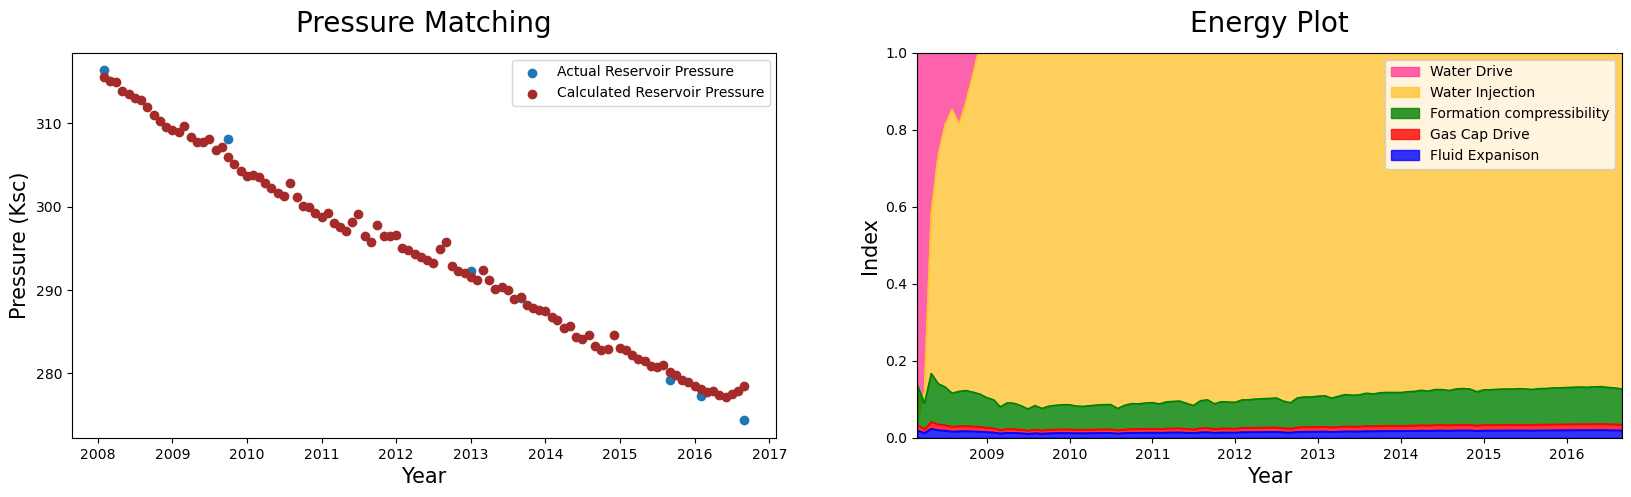

In [59]:

#Importing Dataset
data=pd.read_excel("Input_Reservoir_mbal_code 22.xlsx",sheet_name=2)

#Initialing Values
Psc,Tsc,T,Pbp,Rsi,N,m,J,Wei,Pi,Swi,Cw,Cf,Panm1,Pnm1,Wenm1,Nfoi,Gfgi,Vwi,hsand,poro,re,r_aq,k,mu_v,Boi=data["Values"].dropna()
J=1363.52
Wei=1473.10

#Importing dataset with header ==second row
data=pd.read_excel("Input_Reservoir_mbal_code 22.xlsx",sheet_name=2)

#Calculating BG and BT for Measured Pressure
BG_BT=data[["Pressure","Z","BO","RS"]].dropna().reset_index(drop=True)
BG_BT["BG"],BG_BT["BT"]=Bg_Bt_calculation(BG_BT,Psc,T,Tsc,Pbp,Rsi)
BG_BT["BG"]=data[["Bg - PVT"]].dropna().reset_index(drop=True)
BG_BT["BG"]=(BG_BT["BG"]/5.6146)*1000
data["Rp"]=(data["Gp"]/data["Np"])*1000
Np,Wp,Rp,t,Wi,Gp,DeltaT=data["Np"],data["Wp"],data["Rp"],data["Date"].values,data["Wi"],data["Gp"] * 1E+3,Delta_T(data["Days"])



#Initial Bg and Bt
Bgi,Bti=BG(Pi),BT(Pi,Pbp)
Cfactor = (Swi*Cw+Cf)/(1-Swi)

#Calculating Pressure, We and aquifer pressure
pressure,WE,P_aq=[],[],[]
for i in range(len(Np)):
    
    new=NewP(Panm1, Np[i],Rp[i], Wp[i], DeltaT[i], Pnm1, Wenm1, N, m, J, Wei, Pi, Cfactor, Bgi, Bti, Pbp, Rsi)
    pressure.append(new)
    Wenm1= We(new, Panm1, DeltaT[i], Pnm1, Wenm1, Pi, J, Wei)
    WE.append(Wenm1)
    Panm1=  Pi * (1 - (Wenm1/ (Wei* 1000000)))
    P_aq.append(Panm1)
    Pnm1=new
    
data["Calculated_Pressure"],data["We"],data["P aq"]=pressure,WE,P_aq
p=data["Calculated_Pressure"].values

#Plotting Calculated Pressure
Measured_pres=data[data["Actual Reservoir Pressure"]>0]
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Pressure Matching', size=20, pad=15)

plt.scatter(Measured_pres['Date'], Measured_pres['Actual Reservoir Pressure']/14.2233)
plt.scatter(data['Date'],data["Calculated_Pressure"]/14.2233,color = 'brown')
plt.xlabel('Year', size=15)
plt.ylabel('Pressure (Ksc)', size=15)
plt.legend(labels=['Actual Reservoir Pressure','Calculated Reservoir Pressure',"P aq"]) 


#Calculatin BG BT for Calculated Pressure
bg_l=[]
bt_l=[]
for i in data.index:
    bg_l.append(BG(data["Calculated_Pressure"][i]))
    bt_l.append(BT(data["Calculated_Pressure"][i],Pi))
data['Bg'] = np.array(bg_l)
data['Bt'] = np.array(bt_l)
Bg,Bt=data["Bg"].values * (1 / 1E+3) ,data["Bt"].values

rs=[]
for i in p:
    rs.append(RS(i))
data["Rs(scf/stbo)"]=rs
data["Rs(scum/kl)"]=data["Rs(scf/stbo)"]/5.6146
data["Bg(vol/vol)"]=data["Bg"]*5.6146/1000

# Converting Units and variable names
Bw = np.full(len(data), 1) # Water FVF is made constant, 1 RB/STB
we=data["We"].values
Nfoi = Nfoi * 1E+6 # OOIP from volumetrics, STB
Gfgi = Gfgi * 1E+9 
Bgi=Bgi/1000
Vwi = Vwi * 1E+6 # Interstitial water volume, bbl

# initialize with type: saturated_nonvolatile_totaloil
obj1=saturated_nonvolatile_totaloil()

# calculate material balance parameters
F, Efw, Eo, Eg = saturated_nonvolatile_totaloil.calculate_params( obj1, p, Bg, Bt, Rsi, Np.values, Gp.values, Cf, Cw, Swi)

# calculate drive indices
Idd, Isd, Ifd, Iwd, Iwi = saturated_nonvolatile_totaloil.indices( obj1,F, Efw, Eo, Eg, Nfoi, Gfgi, Boi, Bgi, we, Bw, Wp.values, Wi.values)

# display energy plot
saturated_nonvolatile_totaloil.energy_plot(t, Idd, Isd, Ifd, Iwi)


In [60]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(data)

    Constant Values          Values  Pressure         Z       BO     RS  \
0                Psc      15.025000   3494.50  0.502769  1.48568  806.0   
1                Tsc      60.000000   3594.55  0.493545  1.48364  806.0   
2                  T     230.000000   3694.60  0.484320  1.48160  806.0   
3                Pbp    3429.308000   3794.65  0.475096  1.47957  806.0   
4                Rsi    1402.000000   3894.70  0.465872  1.47753  806.0   
5                  N     173.000000   3994.75  0.458520  1.47561  806.0   
6                  m       0.000000   4094.80  0.451430  1.47371  806.0   
7                  J    1363.520000   4194.85  0.444339  1.47181  806.0   
8                Wei    1473.100000   4294.90  0.437248  1.46991  806.0   
9                 Pi    4500.000000   4394.95  0.430758  1.46806  806.0   
10               Swi       0.200000   4495.00  0.425583  1.46636  806.0   
11                Cw       0.000002       NaN       NaN      NaN    NaN   
12                Cf     

In [61]:

bo_l=[]
for i in data.index:
    bo_l.append(BO(data["Calculated_Pressure"][i]))
data["Bo(vol/vol)"] = np.array(bo_l)
data

,Constant Values,Values,Pressure,Z,BO,RS,Bg - PVT,Date,Days,Actual Reservoir Pressure,Np,Wp,Gp,Wi,Rp,Calculated_Pressure,We,P aq,Bg,Bt,Rs(scf/stbo),Rs(scum/kl),Bg(vol/vol),Bo(vol/vol)
0,Psc,15.025000,3494.50,0.502769,1.48568,806.0,0.000950,2008-02-01,29,4500.000000,3.082919e+05,2.591191e+03,2.496046e+05,0.000000e+00,809.637433,4488.454577,2.150174e+05,4499.343169,0.138607,1.466469,806.0,143.554305,0.000778,1.466469
1,Tsc,60.000000,3594.55,0.493545,1.48364,806.0,0.000928,2008-03-01,60,NaN,8.318006e+05,2.763388e+03,6.801322e+05,0.000000e+00,817.662545,4480.795195,7.986551e+05,4497.560283,0.138781,1.466597,806.0,143.554305,0.000779,1.466597
2,T,230.000000,3694.60,0.484320,1.48160,806.0,0.000906,2008-04-01,90,NaN,1.299864e+06,5.790662e+03,1.086479e+06,1.871388e+05,835.840039,4480.526786,1.448485e+06,4495.575194,0.138787,1.466601,806.0,143.554305,0.000779,1.466601
3,Pbp,3429.308000,3794.65,0.475096,1.47957,806.0,0.000886,2008-05-01,121,NaN,2.087870e+06,1.080298e+05,1.760702e+06,1.579307e+06,843.300891,4464.857991,2.355878e+06,4492.803306,0.139146,1.466864,806.0,143.554305,0.000781,1.466864
4,Rsi,1402.000000,3894.70,0.465872,1.47753,806.0,0.000867,2008-06-01,151,NaN,2.990851e+06,1.110089e+05,2.520404e+06,2.911512e+06,842.704601,4460.027330,3.523338e+06,4489.236969,0.139257,1.466946,806.0,143.554305,0.000782,1.466946
5,N,173.000000,3994.75,0.458520,1.47561,806.0,0.000849,2008-07-01,182,NaN,4.035088e+06,1.136225e+05,3.391099e+06,4.370935e+06,840.402733,4452.378084,4.833276e+06,4485.235393,0.139433,1.467075,806.0,143.554305,0.000783,1.467075
6,m,0.000000,4094.80,0.451430,1.47371,806.0,0.000833,2008-08-01,213,NaN,5.074074e+06,1.172443e+05,4.235951e+06,5.807491e+06,834.822567,4448.738279,6.208364e+06,4481.034800,0.139518,1.467137,806.0,143.554305,0.000783,1.467137
7,J,1363.520000,4194.85,0.444339,1.47181,806.0,0.000818,2008-09-01,243,NaN,6.281487e+06,1.201589e+05,5.208040e+06,6.835231e+06,829.109439,4437.302952,7.670126e+06,4476.569434,0.139783,1.467331,806.0,143.554305,0.000785,1.467331
8,Wei,1473.100000,4294.90,0.437248,1.46991,806.0,0.000804,2008-10-01,274,NaN,7.770941e+06,1.247138e+05,6.400183e+06,9.072880e+06,823.604603,4424.068395,9.489597e+06,4471.011346,0.140092,1.467557,806.0,143.554305,0.000787,1.467557
9,Pi,4500.000000,4394.95,0.430758,1.46806,806.0,0.000790,2008-11-01,304,NaN,9.342983e+06,1.409175e+05,7.662441e+06,1.185239e+07,820.127904,4413.839998,1.149135e+07,4464.896412,0.140332,1.467733,806.0,143.554305,0.000788,1.467733


In [62]:
# pd.set_option('display.max_rows', None)
# print(data)

In [63]:
# xy =data['Calculated_Pressure']
# xy.to_excel("Mbal calculated pressure data.xlsx")

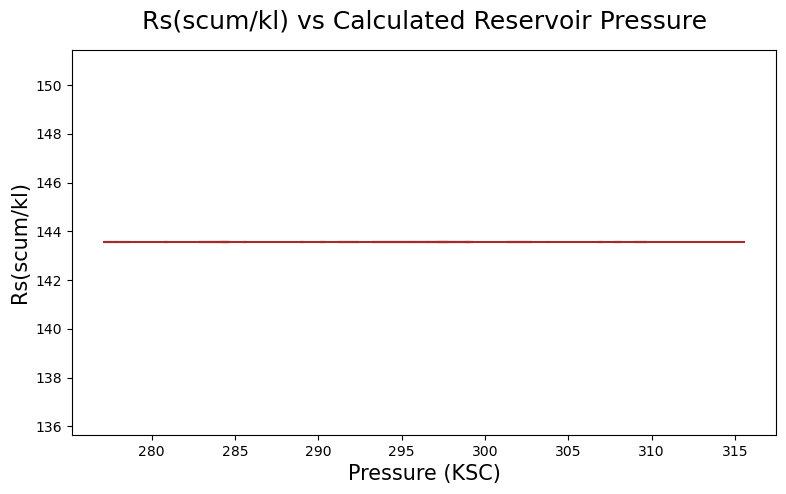

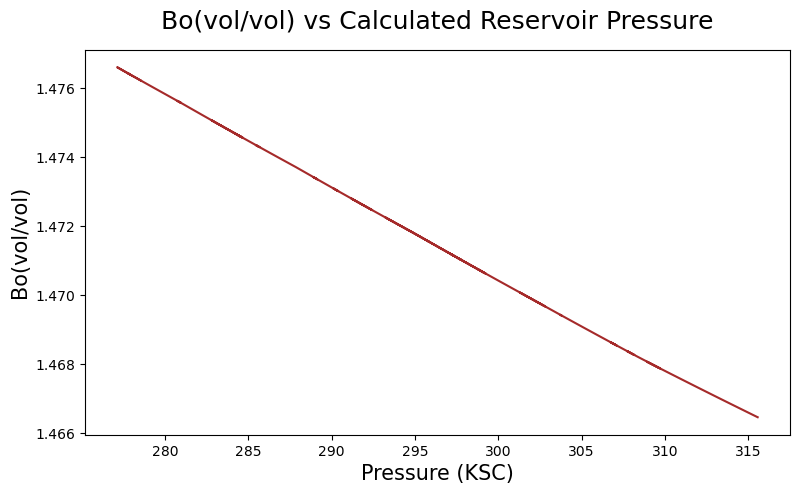

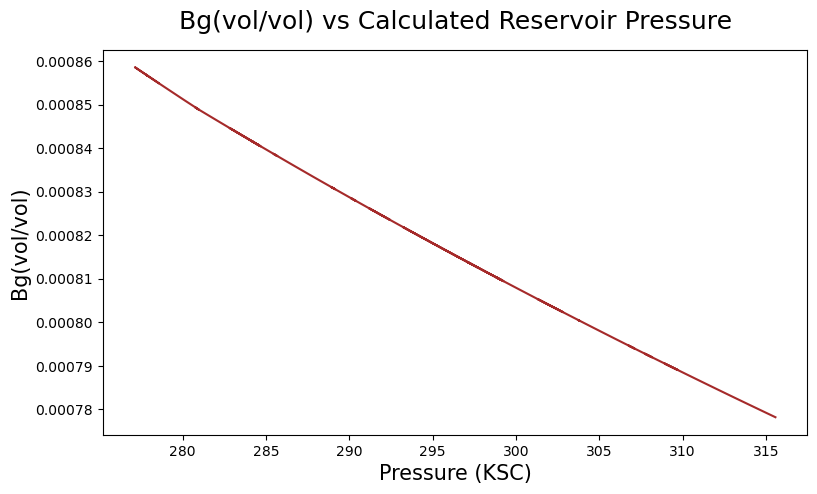

In [64]:

def graph(df,name):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(name+" vs Calculated Reservoir Pressure", size=18, pad=15)

    plt.plot(df['Calculated_Pressure']/14.2233,df[name],color = 'brown')
    plt.ylabel(name, size=15)
    plt.xlabel('Pressure (KSC)', size=15)
    plt.show()
#     # ax = plt.gca()
#     # ax.axes.xaxis.set_ticks([])
#     # ax.axes.yaxis.set_ticks([])
#     plt.legend(labels=['Actual Reservoir Pressure','Calculated '+name,"P aq"]) 

graph(data,"Rs(scum/kl)")
graph(data,"Bo(vol/vol)")
graph(data,"Bg(vol/vol)")

In [48]:

energy=pd.DataFrame({"Date":t,"Fluid Expanison":Idd,"Gas Cap Drive":Isd,"Formation compressibility":Ifd,"Water Drive": Iwd,"Water Injection":Iwi})
final_data=data.loc[:,"Date":"Bo(vol/vol)"].drop("Days",axis=1)
final_data.columns=["Date","Actual pressure (psi)","Np (stb) -Cum Oil Production","Wp(stb) Cum Water Production","GP(mcf) Cum Gas Production","Wi(stb) Cum Water Injection","Rp(scf/stb)","SBHP","We (Cum water influx) rb","Aquifer Pressure (psi)","Bg (rb/stb)","Bt (rb/stb)","Rs(scf/stbo)","Rs(scum/kl)","Bg(vol/vol)","Bo(vol/vol)"]
final_data

,Date,Actual pressure (psi),Np (stb) -Cum Oil Production,Wp(stb) Cum Water Production,GP(mcf) Cum Gas Production,Wi(stb) Cum Water Injection,Rp(scf/stb),SBHP,We (Cum water influx) rb,Aquifer Pressure (psi),Bg (rb/stb),Bt (rb/stb),Rs(scf/stbo),Rs(scum/kl),Bg(vol/vol),Bo(vol/vol)
0,2008-02-01,4500.454030,3.082919e+05,2.591191e+03,2.496046e+05,0.000000e+00,809.637433,4491.742508,1.537843e+05,4499.530223,0.751542,1.465868,1406.809336,250.562700,0.004220,1.465868
1,2008-03-01,4447.112590,8.318006e+05,2.763388e+03,6.801322e+05,0.000000e+00,817.662545,4485.922661,5.779876e+05,4498.234374,0.752126,1.465976,1404.406823,250.134796,0.004223,1.465976
2,2008-04-01,4427.886605,1.299864e+06,5.790662e+03,1.086479e+06,1.871388e+05,835.840039,4485.206914,1.065172e+06,4496.746131,0.752198,1.465990,1404.110922,250.082094,0.004223,1.465990
3,2008-05-01,4420.304555,2.087870e+06,1.080298e+05,1.760702e+06,1.579307e+06,843.300891,4473.216221,1.760486e+06,4494.622097,0.753407,1.466215,1399.139705,249.196685,0.004230,1.466215
4,2008-06-01,4406.390935,2.990851e+06,1.110089e+05,2.520404e+06,2.911512e+06,842.704601,4470.083847,2.643833e+06,4491.923666,0.753724,1.466274,1397.836662,248.964603,0.004232,1.466274
5,2008-07-01,4404.982115,4.035088e+06,1.136225e+05,3.391099e+06,4.370935e+06,840.402733,4464.535596,3.619872e+06,4488.942078,0.754286,1.466379,1395.524145,248.552728,0.004235,1.466379
6,2008-08-01,4401.254745,5.074074e+06,1.172443e+05,4.235951e+06,5.807491e+06,834.822567,4462.071915,4.636532e+06,4485.836402,0.754537,1.466425,1394.495436,248.369507,0.004236,1.466425
7,2008-09-01,4392.185865,6.281487e+06,1.201589e+05,5.208040e+06,6.835231e+06,829.109439,4454.025066,5.705063e+06,4482.572274,0.755356,1.466578,1391.127549,247.769663,0.004241,1.466578
8,2008-10-01,4369.946799,7.770941e+06,1.247138e+05,6.400183e+06,9.072880e+06,823.604603,4444.504601,7.025834e+06,4478.537607,0.756328,1.466759,1387.127153,247.057164,0.004246,1.466759
9,2008-11-01,4345.964505,9.342983e+06,1.409175e+05,7.662441e+06,1.185239e+07,820.127904,4436.860687,8.481473e+06,4474.090944,0.757113,1.466905,1383.902838,246.482891,0.004251,1.466905


In [21]:
#writer = pd.ExcelWriter("Material Balance_Reservoir_output.xlsx", engine="xlsxwriter")
final_data.to_excel(writer,sheet_name="Material Balance",index=False)
energy.to_excel(writer,sheet_name="Energy Drive",index=False)
writer.close()

NameError: name 'writer' is not defined

In [ ]:
final_data.describe()

In [ ]:
energy.head(10)

In [ ]:
energy

In [ ]:
#History

In [ ]:
# History=pd.read_excel(r"C:\Users\Telesto_PtrEng_01\OneDrive - TELESTO ENERGY PTE. LTD\Personal\TelestoEnergy\AIML_Codes\Notebook\Github_Final\MBAL\Material Balance_History_Output_Submitted to be given to (because wrong data uploaded)_OIL .xlsx")
# Scene1=pd.read_excel(r"C:\Users\Telesto_PtrEng_01\OneDrive - TELESTO ENERGY PTE. LTD\Personal\TelestoEnergy\AIML_Codes\Notebook\Github_Final\MBAL\Material Balance Forecasted_Scene1 from excel output.xlsx")
# Rank1=pd.read_excel(r"C:\Users\Telesto_PtrEng_01\OneDrive - TELESTO ENERGY PTE. LTD\Personal\TelestoEnergy\AIML_Codes\Notebook\Github_Final\MBAL\Material Balance Forecasted_Rank1 from excel output.xlsx")
# Rank2=pd.read_excel(r"C:\Users\Telesto_PtrEng_01\OneDrive - TELESTO ENERGY PTE. LTD\Personal\TelestoEnergy\AIML_Codes\Notebook\Github_Final\MBAL\Material Balance Forecasted_Rank2 from excel output.xlsx")
# old_DCA = pd.read_excel(r"C:\Users\Telesto_PtrEng_01\OneDrive - TELESTO ENERGY PTE. LTD\Personal\TelestoEnergy\AIML_Codes\Notebook\Github_Final\MBAL\Material Balance Forecasted_old_DCA from excel output.xlsx")

In [ ]:
# plt.figure(figsize=(15,12))

# # plt.title(name+" vs Calculated Reservoir Pressure", size=18, pad=15)
# plt.plot(History['Date'],History["SBHP"],color = 'black',label='gh')
# plt.plot(Scene1['Date'],Scene1["SBHP"],color = 'g')
# plt.plot(Rank1['Date'],Rank1["SBHP"],color = 'blue')
# plt.plot(Rank2['Date'],Rank2["SBHP"],color = 'brown')
# plt.plot(old_DCA['Date'],old_DCA["SBHP"],color = 'r')
# plt.ylabel('SBHP(psi)', size=15)
# plt.xlabel('Date', size=15)
# plt.legend()

# # plt.grid(True)


# plt.title('SBHP Scenerio Comparison Plot', fontsize = 18)
# plt.show()